# <a id="2"></a>
<h1 style="background-color:lightcoral;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Welcome to our Graduation Project</h1>

# <a id="1.2"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Stroke Prediction Dataset Overview</h3>

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

|               Column               |                                            Description                                             |
|:----------------------------------:|:--------------------------------------------------------------------------------------------------:|
|               Gender               |                              Male or female (Nominal)                                              |
|                Age                 |                              Age of the patient (Continuous)                                       |
|           Hypertension             |        Whether or not the patient has hypertension (Nominal: "Yes", "No")                         |
|           Heart Disease            |        Whether or not the patient has heart disease (Nominal: "Yes", "No")                        |
|           Ever Married             |        Whether or not the patient has ever been married (Nominal: "Yes", "No")                    |
|             Work Type              |        Type of occupation (Nominal: "Private", "Self-employed", "Govt_job", "children", "Never_worked") |
|           Residence Type           |        Type of residence (Nominal: "Urban", "Rural")                                              |
|        Avg Glucose Level          |        Average glucose level in blood (Continuous)                                                 |
|                BMI                |                              Body Mass Index (Continuous)                                          |
|           Smoking Status           |        Smoking status (Nominal: "formerly smoked", "never smoked", "smokes", "unknown")           |
|              Stroke                |        Whether the patient had a stroke (Binary: "1" means "Yes", "0" means "No")                 |

# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries & loading the data</h3>

In [160]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [161]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h3>

In [162]:
print(f"There are {df.shape[0]} Rows and {df.shape[1]} Columns")

There are 5110 Rows and 12 Columns


In [163]:
print(f"Number of duplicates {df.duplicated().sum()}")

Number of duplicates 0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [165]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [166]:
round(df.describe(include='all'))

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.0,5110,5110.0,5110.0,5110.0,5110,5110,5110,5110.0,4909.0,5110,5110.0
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36518.0,NaN,43.0,0.0,0.0,NaN,NaN,NaN,106.0,29.0,NaN,0.0
std,21162.0,NaN,23.0,0.0,0.0,NaN,NaN,NaN,45.0,8.0,NaN,0.0
min,67.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,55.0,10.0,NaN,0.0
25%,17741.0,NaN,25.0,0.0,0.0,NaN,NaN,NaN,77.0,24.0,NaN,0.0
50%,36932.0,NaN,45.0,0.0,0.0,NaN,NaN,NaN,92.0,28.0,NaN,0.0
75%,54682.0,NaN,61.0,0.0,0.0,NaN,NaN,NaN,114.0,33.0,NaN,0.0


# <a id="2.1"></a>
<h3 style="background-color:lightskyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Dealing With Null Values</h3>

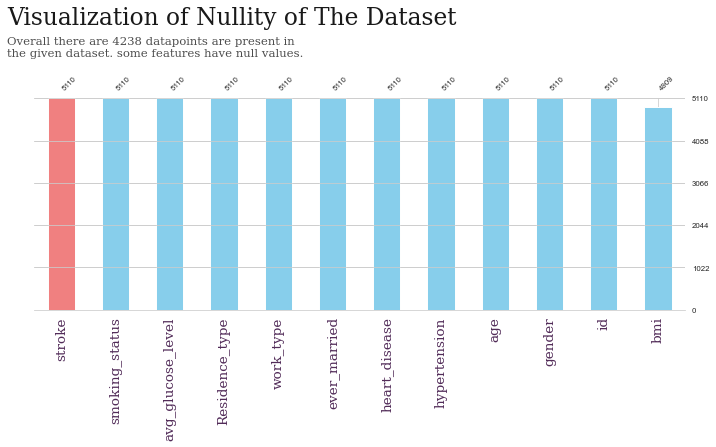

In [167]:
import missingno as msno

color = ['lightcoral','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off', filter = 'top')

ax.text(-1,1.35,'Visualization of Nullity of The Dataset',{'font': 'serif', 'size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'Overall there are 4238 datapoints are present in \nthe given dataset. some features have null values.',{'font': 'serif', 'size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'serif', 'size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()

In [168]:
df = df.dropna(subset=['bmi'])

In [169]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Visualization Functions</h3>

In [170]:
def kde_plot(col):
    plt.figure(figsize=(10,6))
    
    # Set the style of the plot
    sns.set_style("whitegrid")
    
    # Set the background color
    plt.rcParams['axes.facecolor'] = '#f0f0f0'
    
    # Generate the KDE plot
    sns.kdeplot(df[col], shade=True, color='lightcoral')
    
    plt.show()

In [171]:
def kde_with_target(col):
    plt.figure(figsize=(10,6))

    data1 = df[df['stroke'] == 1][col]
    data2 = df[df['stroke'] == 0][col]

    plot1 = sns.kdeplot(data1, shade=True, color='skyblue')
    plot2 = sns.kdeplot(data2, shade=True, color='lightcoral')

    plt.suptitle(f"The distribution of {col} for people with Stroke & without Stroke")

    plt.legend(title='Stroke', labels=['With Stroke', 'Without Stroke'])

    plt.show()

In [172]:
def pie_plot(df, group_feature, overall_title, colors):
    # Calculate percentage of each category in the group feature
    grouped = df[group_feature].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(figsize=(8, 6))

        wedges, texts, autotexts = ax.pie(grouped['percentage'], labels=grouped['index'],
                                           autopct='%1.1f%%', colors=colors)
        ax.set_title(f'Distribution of {overall_title}')  # Set the title to be the group feature
        plt.setp(autotexts, size=16, color="w")

        plt.tight_layout()
        plt.show()

In [173]:
def pie_with_target(df, group_feature, overall_title):
    # Calculate percentage of people who developed CHD for each group
    grouped = df.groupby(group_feature)['stroke'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    # Define custom color palette
    custom_palette = {0: 'skyblue', 1: 'lightcoral'}
    # Define custom legend labels
    legend_labels = {0: 'Healthy', 1: 'Stroke'}

    unique_groups = grouped[group_feature].unique()
    num_unique_groups = len(unique_groups)

    # Ensure all stroke statuses are in custom_palette and legend_labels
    assert set(grouped['stroke'].unique()).issubset(custom_palette.keys()), "All stroke statuses must be keys in custom_palette"
    assert set(grouped['stroke'].unique()).issubset(legend_labels.keys()), "All stroke statuses must be keys in legend_labels"

    with plt.style.context('fivethirtyeight'):
        fig, axs = plt.subplots(1, num_unique_groups, figsize=(15, 6))

        if num_unique_groups == 1:
            axs = [axs]  # To handle the case where there is only 1 group

        for i, group_status in enumerate(unique_groups):
            data = grouped[grouped[group_feature]== group_status ]
            labels = data['stroke'].map(legend_labels).tolist() # map stroke status to labels
            colors = data['stroke'].map(custom_palette).tolist() # map stroke status to colors
            wedges, texts, autotexts = axs[i].pie(data['percentage'], labels=labels, colors=colors, autopct='%1.1f%%')

            axs[i].set_title(f'{group_status}')  # Set the title to be the group feature and status
            plt.setp(autotexts, size=16, color="w")
        
        
        fig.suptitle(f'Percentage of people who developed Stroke grouped by {overall_title} status', fontsize=18)
        plt.tight_layout()
        plt.show()

In [174]:
def col_details(col_name):
    
    print(f"Name : {col_name} \nType : {df[col_name].dtype}")
    
    print(f"Number of unique Values : {df[col_name].nunique()}")
    
    print(f"Number of null Values : {df[col_name].isnull().sum()}")
    random_number = np.random.randint(4000)
    print(f"\nSome Random Data \n {df[col_name][random_number:random_number + 5]}")
    print(f"\nTop 5 Values {df[col_name].value_counts().index[:5]}")
    if df[col_name].dtype != "object":
        print(f"Max value : {df[col_name].max()}\nMin Value : {df[col_name].min()}")
    

In [175]:
def IQR_bands(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_band = Q1 - 1.5 * IQR
    upper_band = Q3 + 1.5 * IQR
    return upper_band, lower_band



# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Parameters</h3>

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">ID :</h3>

In [176]:
col_details('id')

Name : id 
Type : int64
Number of unique Values : 4909
Number of null Values : 0

Some Random Data 
 1438    11232
1439    14709
1440    57137
1441    36858
1442    50373
Name: id, dtype: int64

Top 5 Values Int64Index([49152, 21785, 51762, 25982, 5500], dtype='int64')
Max value : 72940
Min Value : 77


# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Gender :</h3>

In [177]:
col_details('gender')

Name : gender 
Type : object
Number of unique Values : 3
Number of null Values : 0

Some Random Data 
 3180    Female
3181      Male
3182    Female
3183    Female
3184    Female
Name: gender, dtype: object

Top 5 Values Index(['Female', 'Male', 'Other'], dtype='object')


In [178]:
grouped = df.groupby('gender')['stroke'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
print(grouped)

   gender  stroke  percentage
0  Female       0   95.857784
1  Female       1    4.142216
2    Male       0   95.574341
3    Male       1    4.425659
4   Other       0  100.000000


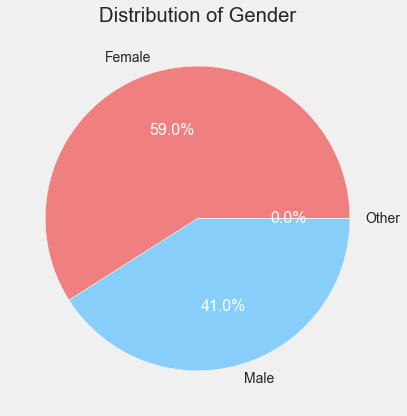

In [179]:
pie_plot(df, 'gender', 'Gender', colors=['lightcoral','lightskyblue','steelblue'])

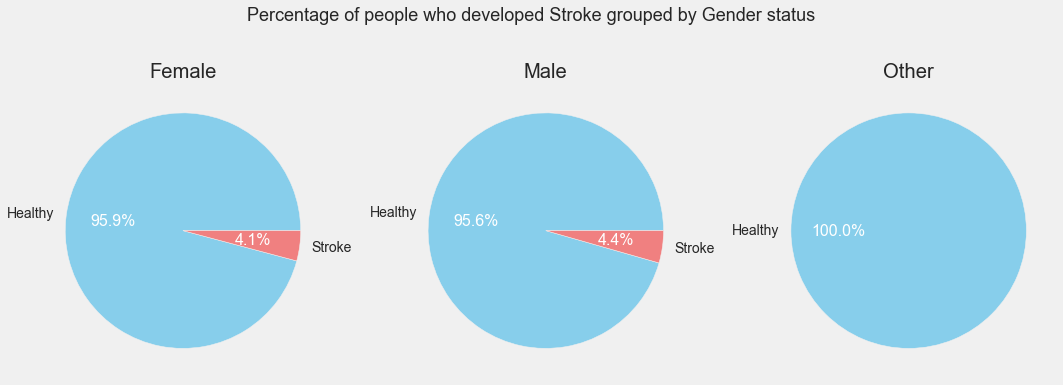

In [180]:
pie_with_target(df, 'gender', 'Gender')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Age :</h3>

In [181]:
col_details('age')

Name : age 
Type : float64
Number of unique Values : 104
Number of null Values : 0

Some Random Data 
 2840    52.0
2841    57.0
2842    29.0
2843    16.0
2844    35.0
Name: age, dtype: float64

Top 5 Values Float64Index([78.0, 57.0, 52.0, 54.0, 51.0], dtype='float64')
Max value : 82.0
Min Value : 0.08


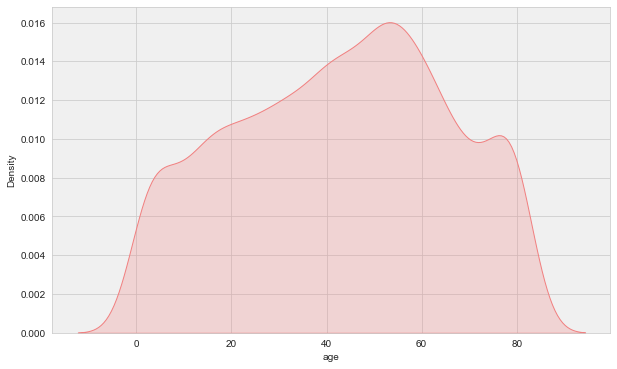

In [182]:
kde_plot('age')

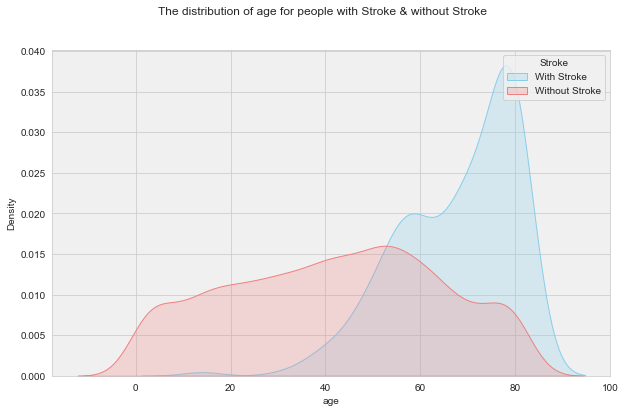

In [183]:
kde_with_target('age')

In [184]:
print("the mean of Age of people with Stroke is ",df[df['stroke'] == 1]['age'].median())

the mean of Age of people with Stroke is  70.0


In [185]:
print("the mean of Age of people without Stroke is ",df[df['stroke'] == 0]['age'].median())

the mean of Age of people without Stroke is  43.0


<AxesSubplot:>

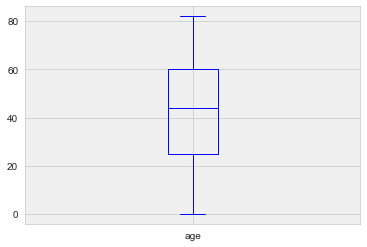

In [186]:
df["age"].plot(kind="box",color='blue')

In [187]:
IQR_bands("age")

(112.5, -27.5)

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Hypertension :</h3>

In [188]:
col_details('hypertension')

Name : hypertension 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 2887    0
2888    0
2889    0
2890    0
2891    0
Name: hypertension, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


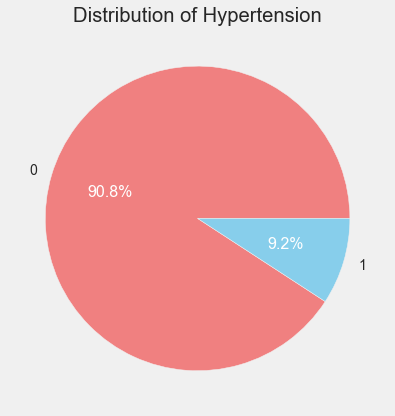

In [189]:
pie_plot(df, 'hypertension', 'Hypertension', colors=['lightcoral','skyblue'])


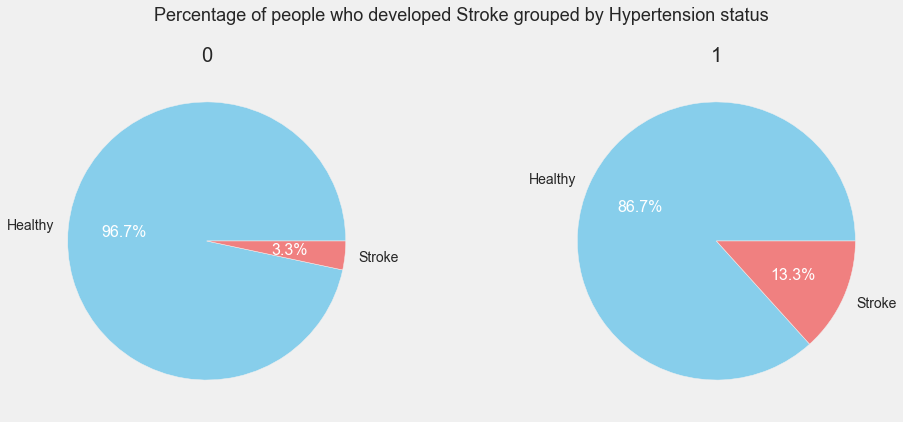

In [190]:
pie_with_target(df, 'hypertension', 'Hypertension')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Heart Disease :</h3>

In [191]:
col_details('heart_disease')

Name : heart_disease 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 1289    0
1290    0
1291    0
1292    0
1294    0
Name: heart_disease, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


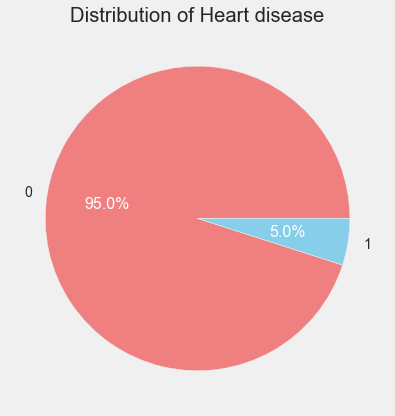

In [192]:
pie_plot(df, 'heart_disease', 'Heart disease', colors=['lightcoral','skyblue'])

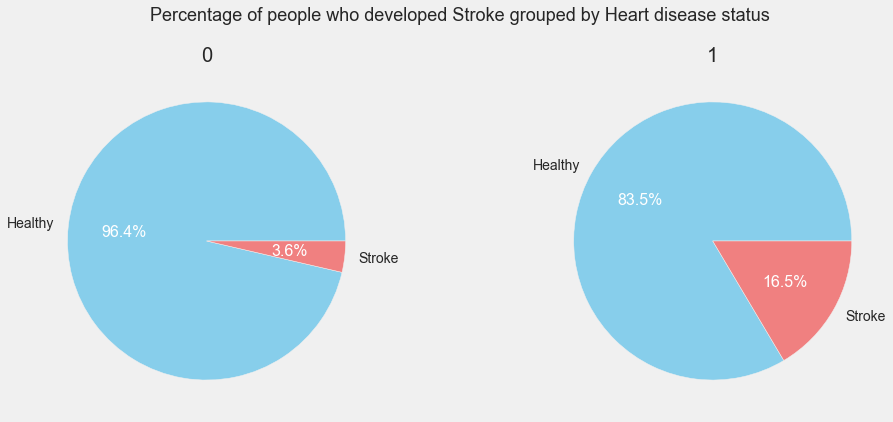

In [193]:
pie_with_target(df, 'heart_disease', 'Heart disease')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Ever Married :</h3>

In [194]:
col_details('ever_married')

Name : ever_married 
Type : object
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 1819    Yes
1820     No
1821     No
1822     No
1823    Yes
Name: ever_married, dtype: object

Top 5 Values Index(['Yes', 'No'], dtype='object')


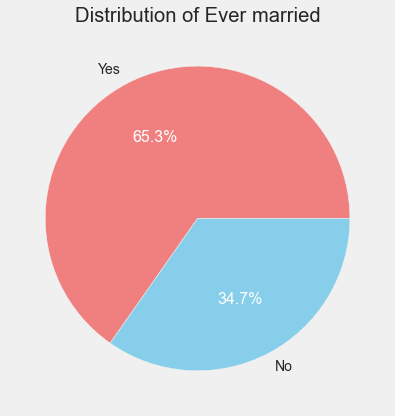

In [195]:
pie_plot(df, 'ever_married', 'Ever married', colors=['lightcoral','skyblue'])

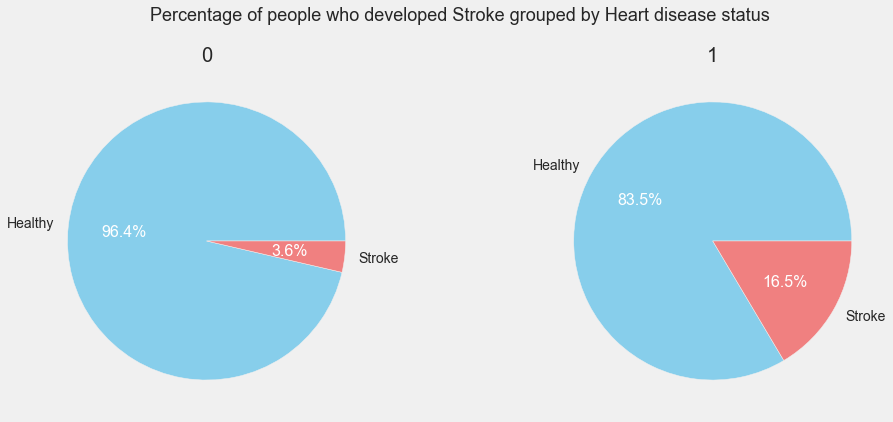

In [196]:
pie_with_target(df, 'heart_disease', 'Heart disease')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Work Type :</h3>

In [197]:
col_details('work_type')

Name : work_type 
Type : object
Number of unique Values : 5
Number of null Values : 0

Some Random Data 
 3830          Private
3831    Self-employed
3832          Private
3833          Private
3834          Private
Name: work_type, dtype: object

Top 5 Values Index(['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'], dtype='object')


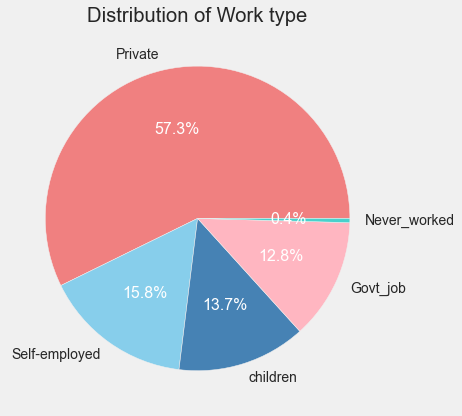

In [198]:
pie_plot(df, 'work_type', 'Work type', colors=['lightcoral','skyblue','steelblue','lightpink','mediumturquoise'])

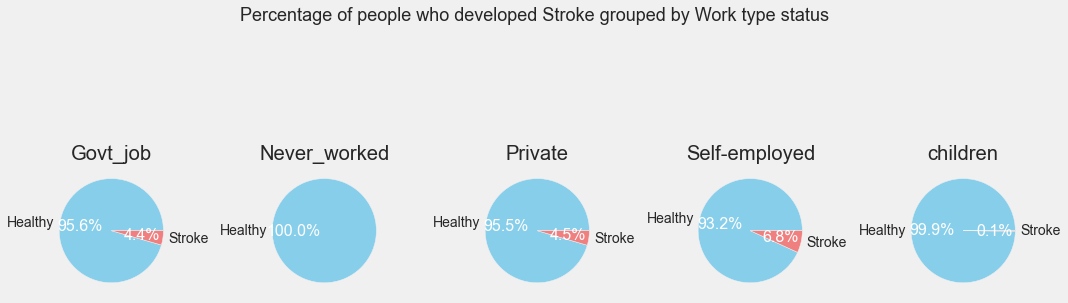

In [199]:
pie_with_target(df,'work_type', 'Work type') 

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Residence Type :</h3>

In [200]:
col_details('Residence_type')

Name : Residence_type 
Type : object
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 1143    Rural
1144    Rural
1145    Urban
1146    Urban
1147    Rural
Name: Residence_type, dtype: object

Top 5 Values Index(['Urban', 'Rural'], dtype='object')


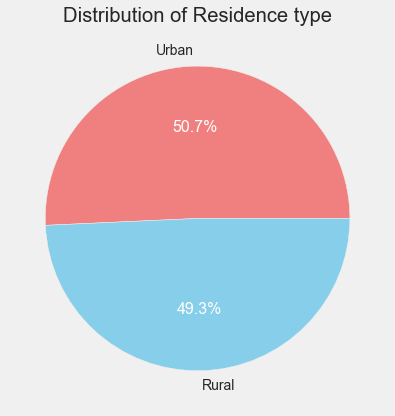

In [201]:
pie_plot(df, 'Residence_type', 'Residence type', colors=['lightcoral','skyblue'])

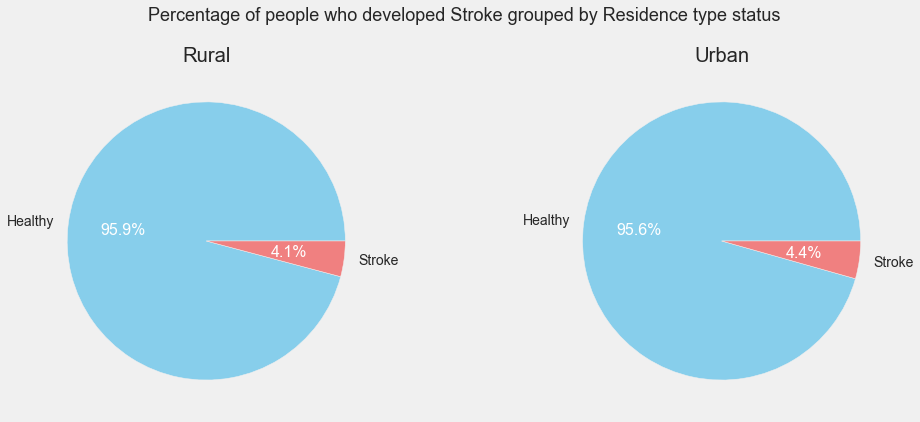

In [202]:
pie_with_target(df, 'Residence_type', 'Residence type')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Average Glucose Level :</h3>

In [203]:
col_details('avg_glucose_level')

Name : avg_glucose_level 
Type : float64
Number of unique Values : 3852
Number of null Values : 0

Some Random Data 
 3929     69.54
3930     62.12
3931    198.30
3932    100.06
3933    101.13
Name: avg_glucose_level, dtype: float64

Top 5 Values Float64Index([93.88, 83.16, 72.49, 91.85, 91.68], dtype='float64')
Max value : 271.74
Min Value : 55.12


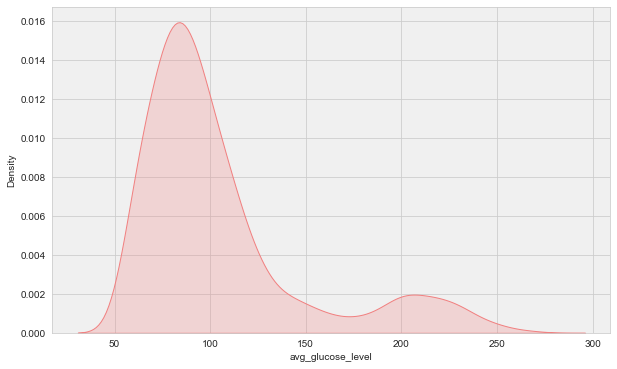

In [204]:
kde_plot('avg_glucose_level')

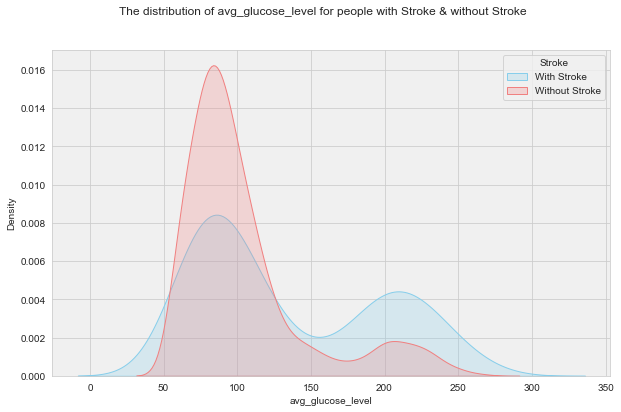

In [205]:
kde_with_target('avg_glucose_level')

<AxesSubplot:>

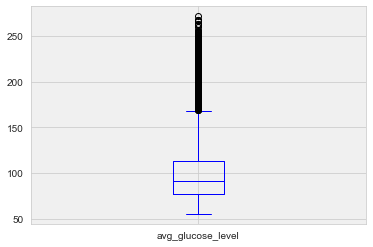

In [206]:
df["avg_glucose_level"].plot(kind="box",color='blue')

In [207]:
IQR_bands("avg_glucose_level")

(168.32, 22.319999999999993)

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">BMI (Body Mass Index) :</h3>

In [208]:
col_details('bmi')

Name : bmi 
Type : float64
Number of unique Values : 418
Number of null Values : 0

Some Random Data 
 355    39.5
356    23.5
357    23.3
358    64.8
359    28.1
Name: bmi, dtype: float64

Top 5 Values Float64Index([28.7, 28.4, 27.7, 27.6, 26.7], dtype='float64')
Max value : 97.6
Min Value : 10.3


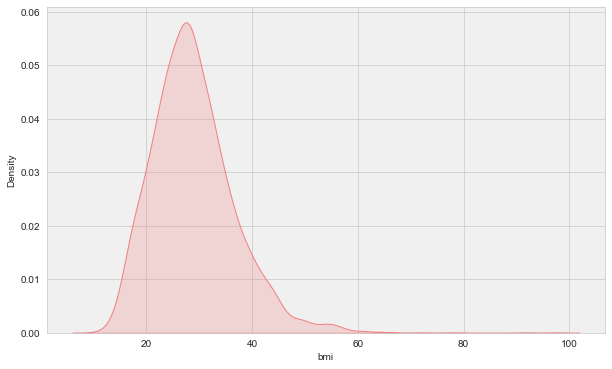

In [209]:
kde_plot('bmi')

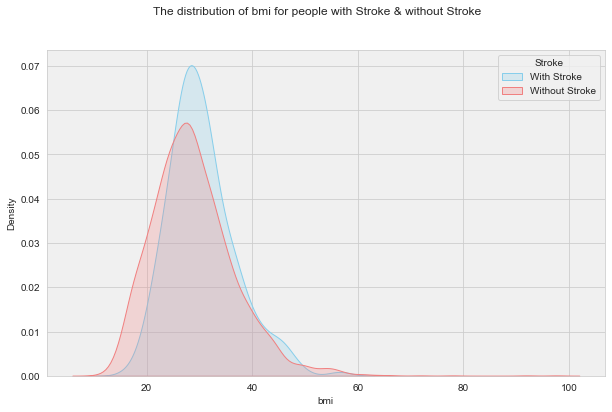

In [210]:
kde_with_target('bmi')

<AxesSubplot:>

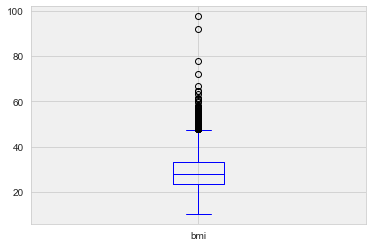

In [211]:
df["bmi"].plot(kind="box",color='blue')

In [212]:
IQR_bands("bmi")

(47.5, 9.099999999999998)

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Smoking Status :</h3>

In [213]:
col_details('smoking_status')

Name : smoking_status 
Type : object
Number of unique Values : 4
Number of null Values : 0

Some Random Data 
 838       never smoked
839       never smoked
840            Unknown
841       never smoked
842    formerly smoked
Name: smoking_status, dtype: object

Top 5 Values Index(['never smoked', 'Unknown', 'formerly smoked', 'smokes'], dtype='object')


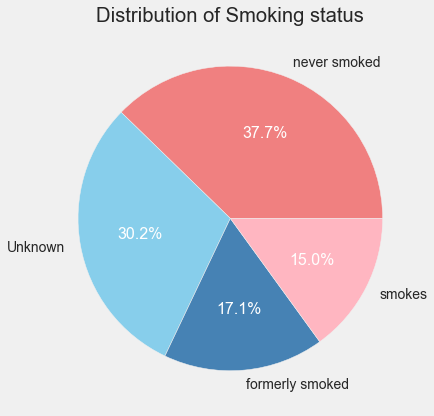

In [214]:
pie_plot(df, 'smoking_status', 'Smoking status', colors=['lightcoral','skyblue','steelblue','lightpink'])

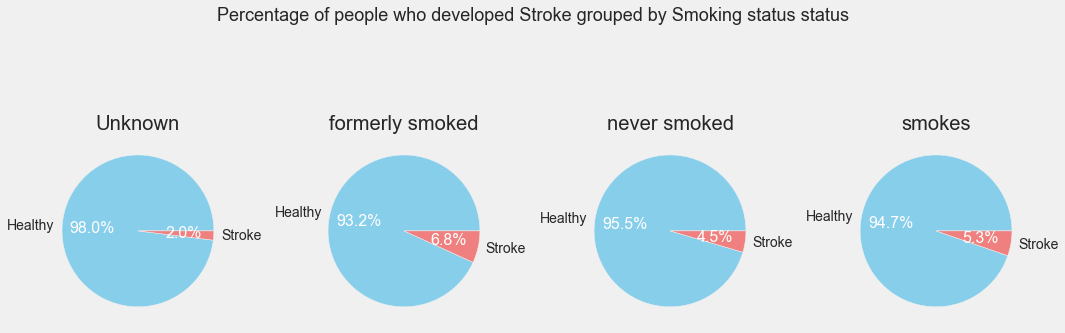

In [215]:
pie_with_target(df, 'smoking_status', 'Smoking status')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Target :</h3>

In [216]:
col_details('stroke')

Name : stroke 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 2773    0
2774    0
2775    0
2776    0
2777    0
Name: stroke, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


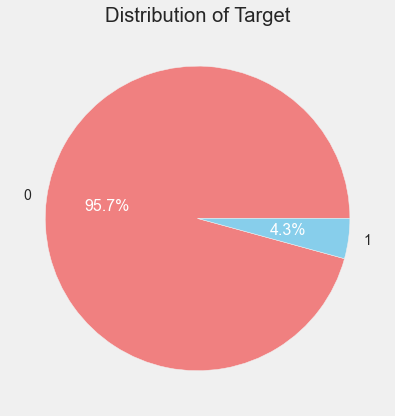

In [217]:
pie_plot(df, 'stroke', 'Target', colors=['lightcoral','skyblue'])

# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Correlation</h3>

In [218]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.008984,0.001147,0.004016,0.006409,0.003084,0.004839
age,0.008984,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.001147,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.004016,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.006409,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.004839,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


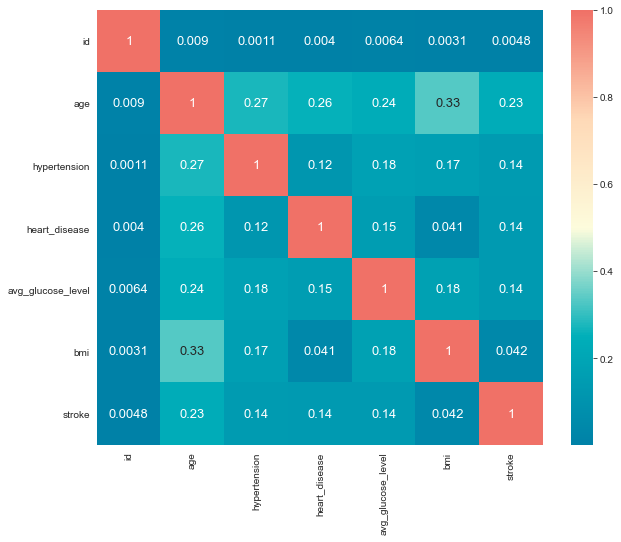

In [219]:
palette = ["#0081A7", "#00AFB9", "#FDFCDC", "#FED9B7", "#F07167"]
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("my_palette", palette)

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, annot_kws={"size": 13}, cmap=cmap)
plt.show()

# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Updating Data</h3>

In [220]:
df.to_csv("Cleaned_stroke_data.csv")